In [ ]:
#Problem 1: ConvNets Transfer Learning
##SYSEN6888 DL499 Nov 3, 2023

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib

import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time


In [ ]:
# Extract the dataset
from google.colab import drive
drive.mount('/content/drive')

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/datasets/fruit360dataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()
os.listdir()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config', '__MACOSX', 'fruit360dataset', 'drive', 'sample_data']

In [ ]:

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/fruit360dataset/Training',  # Update this path if necessary
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        '/content/fruit360dataset/Validation',  # Update this path if necessary
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
# Function to build and compile model
def build_model(base_model, num_classes=131):
    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add new classifier layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(131, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Assuming that num_classes is 131, which is the number of fruit/vegetable categories
num_classes = 131

resnet_base = tf.keras.applications.ResNet101(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
resnet_model = build_model(resnet_base, num_classes=num_classes)

inception_base = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
inception_model = build_model(inception_base, num_classes=num_classes)

efficientnet_base = tf.keras.applications.EfficientNetB1(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
efficientnet_model = build_model(efficientnet_base, num_classes=num_classes)

print(resnet_model.summary())
print(inception_model.summary())
print(efficientnet_model.summary())


Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 106, 106, 3)          0         ['input_17[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 50, 50, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

Epoch 1/50
2116/2116 [==============================] - 75s 32ms/step - loss: 4.1837 - accuracy: 0.0703 - val_loss: 3.8262 - val_accuracy: 0.0981
Epoch 2/50
2116/2116 [==============================] - 65s 31ms/step - loss: 3.4919 - accuracy: 0.1228 - val_loss: 3.5716 - val_accuracy: 0.1150
Epoch 3/50
2116/2116 [==============================] - 65s 31ms/step - loss: 3.2820 - accuracy: 0.1446 - val_loss: 3.4439 - val_accuracy: 0.1393
Epoch 4/50
2116/2116 [==============================] - 66s 31ms/step - loss: 3.1576 - accuracy: 0.1603 - val_loss: 3.3545 - val_accuracy: 0.1424
Epoch 5/50
2116/2116 [==============================] - 66s 31ms/step - loss: 3.0721 - accuracy: 0.1718 - val_loss: 3.2949 - val_accuracy: 0.1457
Epoch 6/50
2116/2116 [==============================] - 65s 31ms/step - loss: 3.0081 - accuracy: 0.1807 - val_loss: 3.2518 - val_accuracy: 0.1516
Epoch 7/50
2116/2116 [==============================] - 65s 31ms/step - loss: 2.9574 - accuracy: 0.1867 - val_loss: 3.2239 -

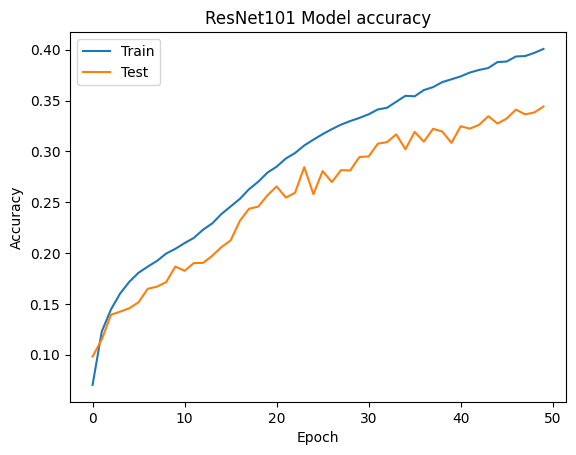

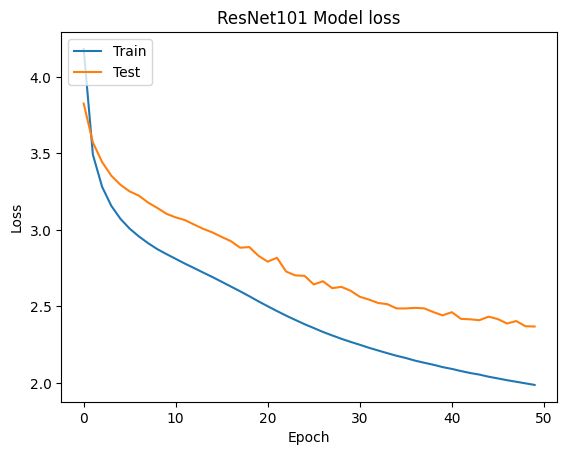

Evaluating on validation set...
709/709 [==============================] - 16s 23ms/step - loss: 2.3683 - accuracy: 0.3441
ResNet101 Validation Accuracy: 34.41%
Measuring inference time...
709/709 [==============================] - 18s 22ms/step
ResNet101 Model Inference Time: 18.017 seconds
ResNet101 Model Size: 42943887 parameters
Epoch 1/50
2116/2116 [==============================] - 67s 29ms/step - loss: 0.3732 - accuracy: 0.9123 - val_loss: 0.5599 - val_accuracy: 0.8676
Epoch 2/50
2116/2116 [==============================] - 61s 29ms/step - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.5565 - val_accuracy: 0.8799
Epoch 3/50
2116/2116 [==============================] - 60s 28ms/step - loss: 0.0379 - accuracy: 0.9892 - val_loss: 0.6222 - val_accuracy: 0.8794
Epoch 4/50
2116/2116 [==============================] - 60s 28ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.7417 - val_accuracy: 0.8738
Epoch 5/50
2116/2116 [==============================] - 60s 28ms/step - loss: 0.0

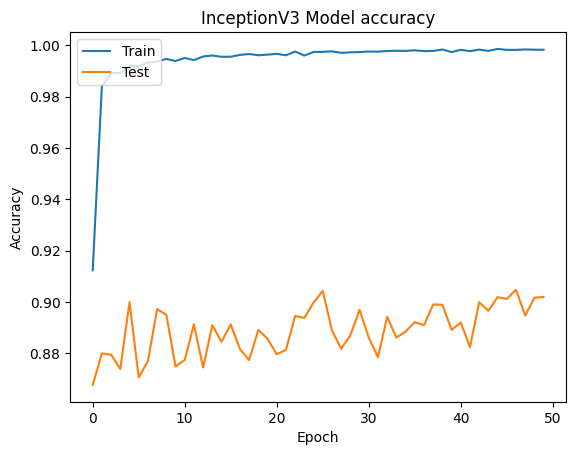

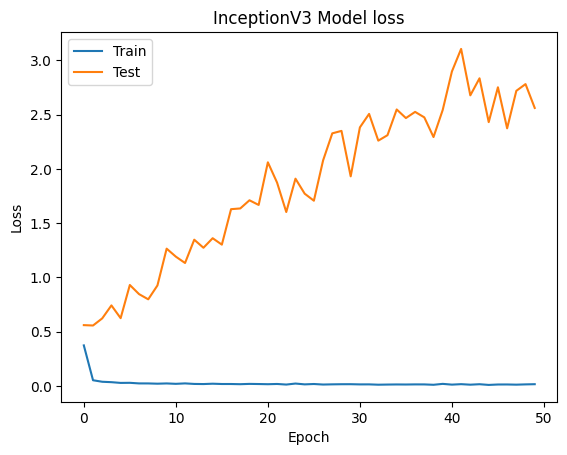

Evaluating on validation set...
709/709 [==============================] - 15s 21ms/step - loss: 2.5616 - accuracy: 0.9019
InceptionV3 Validation Accuracy: 90.19%
Measuring inference time...
709/709 [==============================] - 16s 21ms/step
InceptionV3 Model Inference Time: 16.478 seconds
InceptionV3 Model Size: 22088495 parameters
Epoch 1/50
2116/2116 [==============================] - 75s 30ms/step - loss: 4.8652 - accuracy: 0.0140 - val_loss: 4.8583 - val_accuracy: 0.0145
Epoch 2/50
2116/2116 [==============================] - 62s 29ms/step - loss: 4.8574 - accuracy: 0.0145 - val_loss: 4.8563 - val_accuracy: 0.0145
Epoch 3/50
2116/2116 [==============================] - 62s 29ms/step - loss: 4.8565 - accuracy: 0.0145 - val_loss: 4.8561 - val_accuracy: 0.0145
Epoch 4/50
2116/2116 [==============================] - 61s 29ms/step - loss: 4.8564 - accuracy: 0.0145 - val_loss: 4.8561 - val_accuracy: 0.0145
Epoch 5/50
2116/2116 [==============================] - 62s 29ms/step - los

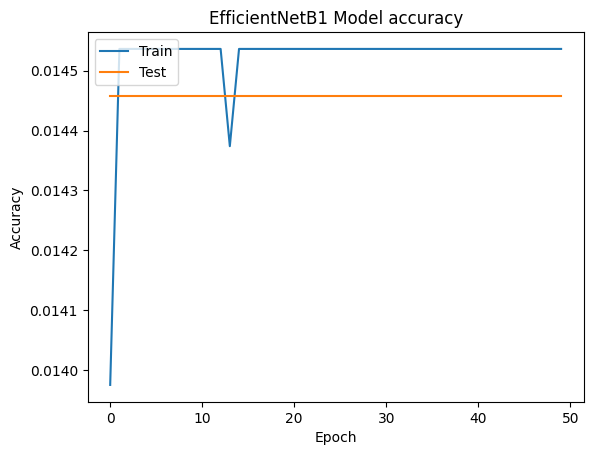

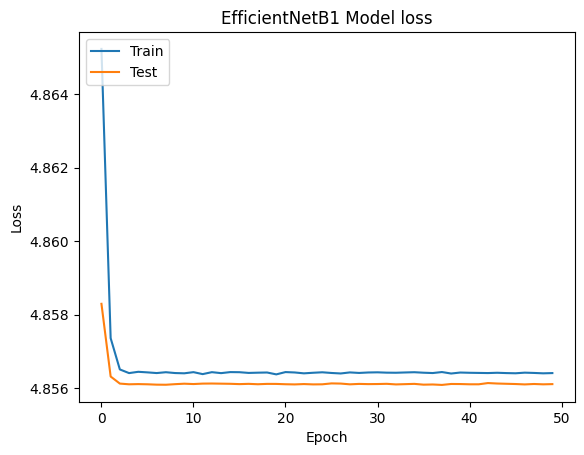

Evaluating on validation set...
709/709 [==============================] - 16s 22ms/step - loss: 4.8561 - accuracy: 0.0145
EfficientNetB1 Validation Accuracy: 1.45%
Measuring inference time...
709/709 [==============================] - 17s 22ms/step
EfficientNetB1 Model Inference Time: 17.608 seconds
EfficientNetB1 Model Size: 6760342 parameters


In [ ]:
# Function to train and evaluate model

from tqdm import tqdm

def train_and_evaluate(model, model_name):
    start_time = time.time()
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator)
    training_time = time.time() - start_time

    for images, labels in train_generator:
        print(f"Debug - Batch label shape: {labels.shape}")  # Should be (batch_size, 131)
        break  # Remove or comment this out for actual training


    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(model_name + ' Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(model_name + ' Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Evaluate the model on the validation set
    print("Evaluating on validation set...")
    results = model.evaluate(validation_generator)
    print("{} Validation Accuracy: {:.2f}%".format(model_name, results[1] * 100))

    # Predicting on validation set to measure inference time
    print("Measuring inference time...")
    start_time = time.time()
    predictions = model.predict(validation_generator)
    inference_time = time.time() - start_time

    # Print inference time and the number of parameters
    print(f"{model_name} Model Inference Time: {inference_time:.3f} seconds")
    print(f"{model_name} Model Size: {model.count_params()} parameters")

    return history, training_time, inference_time, results

# Train and evaluate ResNet101
resnet_history, resnet_training_time, resnet_inference_time, resnet_results = train_and_evaluate(resnet_model, "ResNet101")

# Train and evaluate InceptionV3
inception_history, inception_training_time, inception_inference_time, inception_results = train_and_evaluate(inception_model, "InceptionV3")

# Train and evaluate EfficientNetB1
efficientnet_history, efficientnet_training_time, efficientnet_inference_time, efficientnet_results = train_and_evaluate(efficientnet_model, "EfficientNetB1")